In [ ]:
# Install all required dependencies
!pip install numpy
!pip install pickle
!pip install sklearn
!pip install tensorflow-gpu
!pip install matplotlib

In [2]:
# Import all required dependencies
import numpy as np
import pickle
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [3]:
# Open/Load the dataset
with open("traffic-signs-data/train.p", mode='rb') as train_data:
    train = pickle.load(train_data)
with open("traffic-signs-data/test.p", mode='rb') as test_data:
    test = pickle.load(test_data)
with open("traffic-signs-data/valid.p", mode='rb') as valid_data:
    valid = pickle.load(valid_data)
    

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

In [4]:
# Shuffle to randomize
x_train, y_train = shuffle(x_train, y_train)

In [5]:
# Change to 1-D and Normalize
x_train = np.sum(x_train/3, axis=3, keepdims=True)
x_test = np.sum(x_test/3, axis=3, keepdims=True)
x_valid = np.sum(x_valid/3, axis=3, keepdims=True)

x_train = (x_train-128)/128
x_test = (x_test-128)/128
x_valid = (x_valid-128)/128

In [6]:
# Building the model
model = models.Sequential()

# Layer 1
model.add(Conv2D(20, (3,3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D())

model.add(Dropout(0.2))

# Layer 2
model.add(Conv2D(30, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Dropout(0.2))

# Layer 3
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(256, activation='relu'))

#Layer 4
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 30)        5430      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

In [7]:
# Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Training
history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/40
1088/1088 [==============================] - 4s 4ms/step - loss: 1.2560 - accuracy: 0.6621 - val_loss: 0.5841 - val_accuracy: 0.8651
Epoch 2/40
1088/1088 [==============================] - 4s 3ms/step - loss: 0.3522 - accuracy: 0.9162 - val_loss: 0.3846 - val_accuracy: 0.9113
Epoch 3/40
1088/1088 [==============================] - 4s 3ms/step - loss: 0.2485 - accuracy: 0.9482 - val_loss: 0.4116 - val_accuracy: 0.9007
Epoch 4/40
1088/1088 [==============================] - 4s 3ms/step - loss: 0.2092 - accuracy: 0.9605 - val_loss: 0.3586 - val_accuracy: 0.9202
Epoch 5/40
1088/1088 [==============================] - 4s 3ms/step - loss: 0.1905 - accuracy: 0.9677 - val_loss: 0.3301 - val_accuracy: 0.9270
Epoch 6/40
1088/1088 [==============================] - 3s 3ms/step - loss: 0.1802 - accuracy: 0.9712 - val_loss: 0.2743 - val_accuracy: 0.9422
Epoch 7/40
1088/1088 [==============================] - 3s 3ms/step - loss: 0.1670 - accuracy: 0.9740 - val_loss: 0.3303 - val_accuracy:

In [9]:
# Checking accuracy on test set
score = model.evaluate(x_test, y_test)
print('Test Accuracy = {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.9493
Test Accuracy = 0.9493269920349121


In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

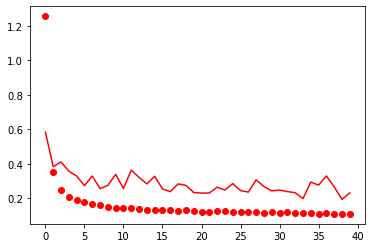

In [11]:
# Visualization of losses
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

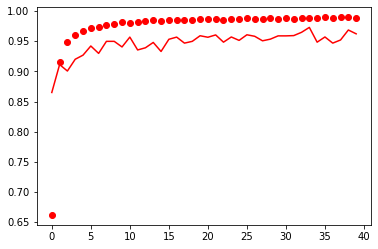

In [12]:
# Visualization of accuracies
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


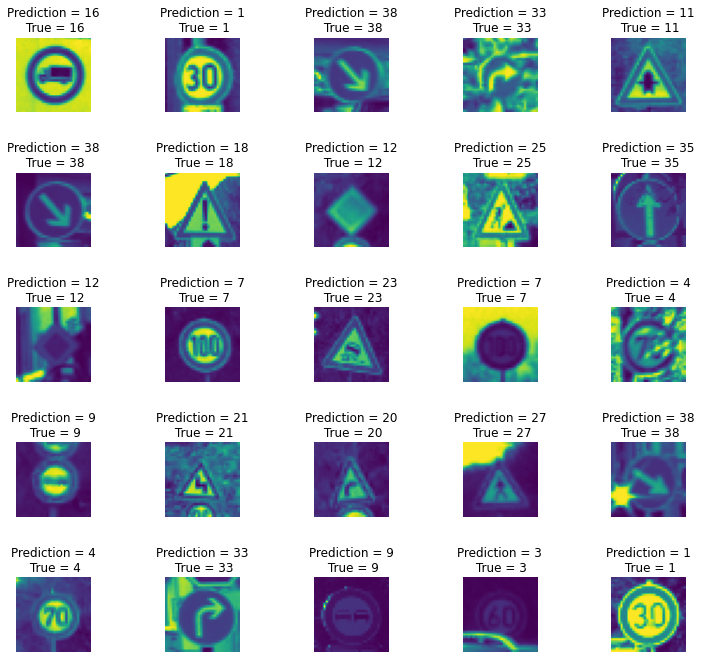

In [13]:
# Visualizing predicted outputs
predicted_classes = model.predict_classes(x_test)
y_true = y_test

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [14]:
# Save the weights separately
model.save_weights('Final_weights.h5')

#Save the model (including weights)
model.save('model.h5')